# Importación de Librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
show = plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carga de Datos

In [3]:
data = pd.read_csv('./data/crx.data')
data.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [4]:
data.columns

Index(['b', '30.83', '0', 'u', 'g', 'w', 'v', '1.25', 't', 't.1', '01', 'f',
       'g.1', '00202', '0.1', '+'],
      dtype='object')

Base de datos financieros anonimizados
* Fuente: https://archive.ics.uci.edu/ml/datasets/credit+approval

# Preprocesamiento

In [5]:
nuevas_variables = {
    "b": "genero",
    "30.83": "edad",
    "0": "deuda",
    "u": "estado_civil",
    "g": "cliente",
    "w": "educacion",
    "v": "etnia",
    "1.25": "años_empleado",
    "t": "no_pago",
    "t.1": "empleado",
    "01": "score_crediticio",
    "f": "licencia_conduccion",
    "g.1": "ciudadania",
    "00202": "zip",
    "0.1": "ingreso",
    "+": "tarjeta_aprobada"
}

In [6]:
data = data.rename(columns=nuevas_variables)
data.head()

,genero,edad,deuda,estado_civil,cliente,educacion,etnia,años_empleado,no_pago,empleado,score_crediticio,licencia_conduccion,ciudadania,zip,ingreso,tarjeta_aprobada
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [7]:
# Describiendo númericos
data.describe()

,deuda,años_empleado,score_crediticio,ingreso
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


C:\Users\fchav\AppData\Local\Temp\ipykernel_7484\862812372.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(data.corr(),annot=True, cmap='Blues')


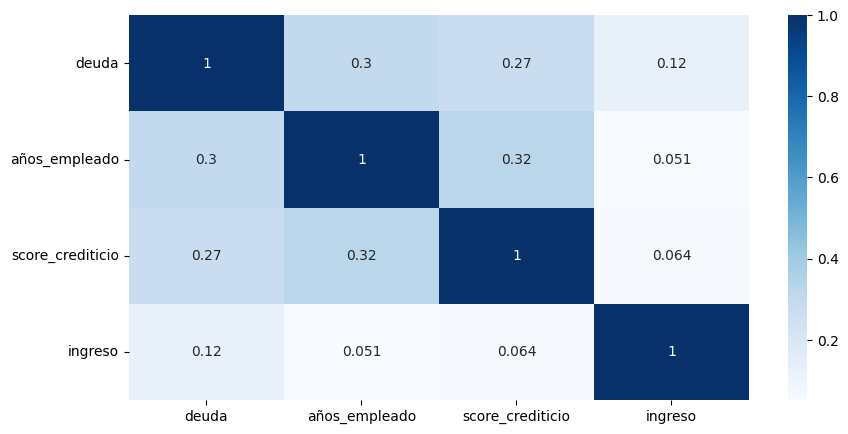

In [9]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
g = sns.heatmap(data.corr(),annot=True, cmap='Blues')
show

In [10]:
# Revisando Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genero               689 non-null    object 
 1   edad                 689 non-null    object 
 2   deuda                689 non-null    float64
 3   estado_civil         689 non-null    object 
 4   cliente              689 non-null    object 
 5   educacion            689 non-null    object 
 6   etnia                689 non-null    object 
 7   años_empleado        689 non-null    float64
 8   no_pago              689 non-null    object 
 9   empleado             689 non-null    object 
 10  score_crediticio     689 non-null    int64  
 11  licencia_conduccion  689 non-null    object 
 12  ciudadania           689 non-null    object 
 13  zip                  689 non-null    object 
 14  ingreso              689 non-null    int64  
 15  tarjeta_aprobada     689 non-null    obj

In [11]:
for col in data.columns:
    print(col)
    print(pd.unique(data[col]))
    print()

genero
['a' 'b' '?']

edad
['58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42' '42.50'
 '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25' '21.83'
 '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58' '57.42'
 '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00' '27.75'
 '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00' '31.92'
 '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33' '23.17'
 '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67' '36.00'
 '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67' '34.08'
 '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67' '34.00'
 '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50' '37.50'
 '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75' '25.42'
 '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50' '47.67'
 '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58' '33.58'
 '18.83' '26.92' '31.25' '56

In [12]:
for col in data.columns:
    if data[col].dtype == "object":
        print(col)
        print(pd.unique(data[col]))
        print()

genero
['a' 'b' '?']

edad
['58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42' '42.50'
 '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25' '21.83'
 '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58' '57.42'
 '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00' '27.75'
 '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00' '31.92'
 '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33' '23.17'
 '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67' '36.00'
 '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67' '34.08'
 '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67' '34.00'
 '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50' '37.50'
 '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75' '25.42'
 '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50' '47.67'
 '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58' '33.58'
 '18.83' '26.92' '31.25' '56

In [13]:
data = data.replace('?', np.nan)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genero               677 non-null    object 
 1   edad                 677 non-null    object 
 2   deuda                689 non-null    float64
 3   estado_civil         683 non-null    object 
 4   cliente              683 non-null    object 
 5   educacion            680 non-null    object 
 6   etnia                680 non-null    object 
 7   años_empleado        689 non-null    float64
 8   no_pago              689 non-null    object 
 9   empleado             689 non-null    object 
 10  score_crediticio     689 non-null    int64  
 11  licencia_conduccion  689 non-null    object 
 12  ciudadania           689 non-null    object 
 13  zip                  676 non-null    object 
 14  ingreso              689 non-null    int64  
 15  tarjeta_aprobada     689 non-null    obj

In [15]:
for col in data.columns:
    print(col)
    print(pd.unique(data[col]))
    print()

genero
['a' 'b' nan]

edad
['58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42' '42.50'
 '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25' '21.83'
 '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58' '57.42'
 '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00' '27.75'
 '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00' '31.92'
 '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33' '23.17'
 '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67' '36.00'
 '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67' '34.08'
 '21.67' '21.50' '49.58' '27.67' '39.83' nan '37.17' '25.67' '34.00'
 '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50' '37.50'
 '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75' '25.42'
 '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50' '47.67'
 '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58' '33.58'
 '18.83' '26.92' '31.25' '56

In [16]:
# Imputando con la media datos númericos
data.fillna(data.mean(), inplace=True)

C:\Users\fchav\AppData\Local\Temp\ipykernel_7484\1376185791.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [17]:
data.isnull().sum()

genero                 12
edad                   12
deuda                   0
estado_civil            6
cliente                 6
educacion               9
etnia                   9
años_empleado           0
no_pago                 0
empleado                0
score_crediticio        0
licencia_conduccion     0
ciudadania              0
zip                    13
ingreso                 0
tarjeta_aprobada        0
dtype: int64

In [18]:
# Imputando con moda datos categóricos
for col in data.columns:
    if data[col].dtypes == 'object':
        data = data.fillna(data[col].value_counts().index[0])

In [19]:
data.isnull().sum()

genero                 0
edad                   0
deuda                  0
estado_civil           0
cliente                0
educacion              0
etnia                  0
años_empleado          0
no_pago                0
empleado               0
score_crediticio       0
licencia_conduccion    0
ciudadania             0
zip                    0
ingreso                0
tarjeta_aprobada       0
dtype: int64

# Featuring Selection

In [20]:
data = data.drop(["licencia_conduccion", "zip"], axis=1)
data.shape

(689, 14)

# Label Encoding (No-Númericos a Númericos)

In [21]:
# Instanciar el Label Encoder
le = LabelEncoder()

# hacer la transformación numérica para cada variable categórica
for col in data.columns.values:
    if data[col].dtypes =='object': 
        data[col]=le.fit_transform(data[col])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genero            689 non-null    int32  
 1   edad              689 non-null    int32  
 2   deuda             689 non-null    float64
 3   estado_civil      689 non-null    int32  
 4   cliente           689 non-null    int32  
 5   educacion         689 non-null    int32  
 6   etnia             689 non-null    int32  
 7   años_empleado     689 non-null    float64
 8   no_pago           689 non-null    int32  
 9   empleado          689 non-null    int32  
 10  score_crediticio  689 non-null    int64  
 11  ciudadania        689 non-null    int32  
 12  ingreso           689 non-null    int64  
 13  tarjeta_aprobada  689 non-null    int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 48.6 KB


In [23]:
data

,genero,edad,deuda,estado_civil,cliente,educacion,etnia,años_empleado,no_pago,empleado,score_crediticio,ciudadania,ingreso,tarjeta_aprobada
0,0,327,4.460,2,1,11,4,3.04,1,1,6,0,560,0
1,0,89,0.500,2,1,11,4,1.50,1,0,0,0,824,0
2,1,125,1.540,2,1,13,8,3.75,1,1,5,0,3,0
3,1,43,5.625,2,1,13,8,1.71,1,0,0,2,0,0
4,1,167,4.000,2,1,10,8,2.50,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,52,10.085,3,3,5,4,1.25,0,0,0,0,0,1
685,0,71,0.750,2,1,2,8,2.00,0,1,2,0,394,1
686,0,97,13.500,3,3,6,3,2.00,0,1,1,0,1,1
687,1,20,0.205,2,1,0,8,0.04,0,0,0,0,750,1


* Funciona para Categoricas Ordinales pero para categóricas no ordinales mejor usar variables dummies con One Hot Encoding

# One Hot Encoding

In [24]:
# variables para one-hot encoding deben ser string
dummy_vars = {"genero": str,
              "estado_civil": str,
              "cliente": str,
              "etnia": str,
              "no_pago": str,
              "empleado": str,
              "ciudadania": str}

In [26]:
# Deben ser tipo object
data = data.astype(dummy_vars)

In [27]:
data.dtypes

genero               object
edad                  int32
deuda               float64
estado_civil         object
cliente              object
educacion             int32
etnia                object
años_empleado       float64
no_pago              object
empleado             object
score_crediticio      int64
ciudadania           object
ingreso               int64
tarjeta_aprobada      int32
dtype: object

In [28]:
# crear las nuevas variables dummies / Drop first es para eliminar la colinealidad
data = pd.get_dummies(data, drop_first=True)

In [30]:
data.shape

(689, 27)

# Reorganizando el DataFrame

In [31]:
# copiar el target en la última columna
data["ultima"] = data["tarjeta_aprobada"]

# eliminar la columna inicial del target
data = data.drop("tarjeta_aprobada", axis=1)

# nombrarla nuevamente para facilidad
data.rename(columns={"ultima": "tc_aprobada"}, inplace=True)

data

,edad,deuda,educacion,años_empleado,score_crediticio,ingreso,genero_1,estado_civil_1,estado_civil_2,estado_civil_3,...,etnia_5,etnia_6,etnia_7,etnia_8,etnia_9,no_pago_1,empleado_1,ciudadania_1,ciudadania_2,tc_aprobada
0,327,4.460,11,3.04,6,560,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,89,0.500,11,1.50,0,824,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,125,1.540,13,3.75,5,3,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,43,5.625,13,1.71,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,167,4.000,10,2.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,10.085,5,1.25,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
685,71,0.750,2,2.00,2,394,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
686,97,13.500,6,2.00,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
687,20,0.205,0,0.04,0,750,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
data.columns

Index(['edad', 'deuda', 'educacion', 'años_empleado', 'score_crediticio',
       'ingreso', 'genero_1', 'estado_civil_1', 'estado_civil_2',
       'estado_civil_3', 'cliente_1', 'cliente_2', 'cliente_3', 'etnia_1',
       'etnia_2', 'etnia_3', 'etnia_4', 'etnia_5', 'etnia_6', 'etnia_7',
       'etnia_8', 'etnia_9', 'no_pago_1', 'empleado_1', 'ciudadania_1',
       'ciudadania_2', 'tc_aprobada'],
      dtype='object')

# Training and Test

In [33]:
# Convertir a arreglos de numpy
data = data.values

In [34]:
data

array([[3.270e+02, 4.460e+00, 1.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.900e+01, 5.000e-01, 1.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.250e+02, 1.540e+00, 1.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [9.700e+01, 1.350e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+01, 2.050e-01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.960e+02, 3.375e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [35]:
# separar variable explicativas de la variable objetivo
X,y = data[:,0:25], data[:,26]

In [37]:
# separar en datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [38]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(228, 25)
(228,)
(461, 25)
(461,)


In [39]:
# aplicaciones no aprobadas
np.count_nonzero(y)

383

In [40]:
# aplicaciones aprobadas
y.size - np.count_nonzero(y)

306

# Escalar variables númericas

In [41]:
# recordando los rangos actuales
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,149.637744,4.930315,6.594360,2.291757,2.208243,1026.229935,0.687636,0.004338,0.737527,0.247289,...,0.069414,0.212581,0.010846,0.004338,0.002169,0.579176,0.013015,0.520607,0.414317,0.013015
std,95.642001,4.952237,4.463169,3.510664,4.107260,5932.273575,0.463961,0.065795,0.440456,0.431905,...,0.254433,0.409578,0.103690,0.065795,0.046575,0.494228,0.113462,0.500118,0.493139,0.113462
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,1.080000,2.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135.000000,3.000000,6.000000,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,220.000000,8.000000,11.000000,2.750000,2.000000,316.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,348.000000,28.000000,14.000000,28.500000,40.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Reescalar X_train y X_test dado que los valores máximos de cada variable son muy grandes

scaler = MinMaxScaler(feature_range=(0,1)) # instanciar
rescaledX_train = scaler.fit_transform(X_train) # reescalar X de entrenamiento
rescaledX_test = scaler.fit_transform(X_test) # reescalar X de test

In [43]:
# revisar que los rangos de X_train reescalado sean entre 0 y 1
pd.DataFrame(rescaledX_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,0.428351,0.176083,0.471026,0.080413,0.055206,0.010262,0.687636,0.004338,0.737527,0.247289,...,0.069414,0.212581,0.010846,0.004338,0.002169,0.579176,0.013015,0.520607,0.414317,0.013015
std,0.275625,0.176866,0.318798,0.123181,0.102681,0.059323,0.463961,0.065795,0.440456,0.431905,...,0.254433,0.409578,0.103690,0.065795,0.046575,0.494228,0.113462,0.500118,0.493139,0.113462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.201729,0.038571,0.142857,0.005789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.386167,0.107143,0.428571,0.035088,0.000000,0.000030,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.631124,0.285714,0.785714,0.096491,0.050000,0.003160,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# revisar que los rangos de X_test reescalado sean entre 0 y 1
pd.DataFrame(rescaledX_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.433845,0.168318,0.471805,0.139298,0.041699,0.032091,0.710526,0.0,0.780702,0.214912,...,0.109649,0.175439,0.013158,0.008772,0.004386,0.574561,0.008772,0.526316,0.451754,0.008772
std,0.277044,0.190830,0.307554,0.199835,0.091221,0.106366,0.454516,0.0,0.414681,0.411665,...,0.313139,0.381179,0.114201,0.093452,0.066227,0.495497,0.093452,0.500406,0.498762,0.093452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.203305,0.031137,0.142857,0.016667,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.357759,0.085438,0.428571,0.066667,0.000000,0.000320,1.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.660920,0.246820,0.714286,0.168750,0.044776,0.016486,1.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Regresión Logística

In [45]:
# Instanciar un clasificador de Regresión Logística
logreg = LogisticRegression()

# Ajustar una regresión a los datos de entrenamiento
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

# Evaluación del Modelo

<AxesSubplot: >

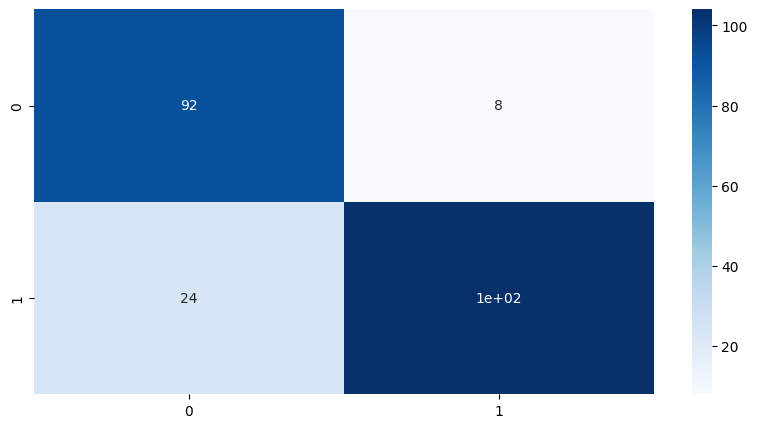

In [46]:
# Usar logreg para predecir aplicaciones de los datos de test
y_pronostico = logreg.predict(rescaledX_test)


# Matriz de confusión para el modelo logreg
matriz_conf = confusion_matrix(y_test, y_pronostico)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matriz_conf, annot=True, ax = ax, cmap='Blues')

In [47]:
# Aciertos del modelo entre total de predicciones
(102 + 92) / (102 + 92 + 8 + 24)

0.8584070796460177

In [48]:
# evaluar el modelo en los datos de entrenamiento
print("Precisión del clasificador de regresión logística en entrenamiento: ", logreg.score(rescaledX_train, y_train))

Precisión del clasificador de regresión logística en entrenamiento:  0.8655097613882863


In [49]:
# Evaluar la precisión en test
print("Precisión del clasificador de regresión logística en test: ", logreg.score(rescaledX_test, y_test))

Precisión del clasificador de regresión logística en test:  0.8596491228070176
